<a href="https://colab.research.google.com/github/Nkashyap-anand/human-posture-estimation/blob/main/TF_CNN_human_posture_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import numpy as np
from time import sleep as s
import cv2
import os
import pandas as pd
import random as rm

In [3]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [4]:
train_dataset = train.flow_from_directory( "/content/drive/MyDrive/posture/training",
                                          target_size= (512,512),
                                          batch_size= 4,
                                          class_mode="categorical")
validation_dataset = train.flow_from_directory( "/content/drive/MyDrive/posture/validation",
                                          target_size= (512,512),
                                          batch_size= 4,
                                          class_mode="categorical")
test_dataset = train.flow_from_directory("/content/drive/MyDrive/posture/testing",
                                    target_size= (512,512),
                                    batch_size= 4,
                                    class_mode="categorical")

Found 2880 images belonging to 4 classes.
Found 960 images belonging to 4 classes.
Found 960 images belonging to 4 classes.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16,(3,3),activation ="relu", input_shape =(512,512,3)),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(32,(3,3),activation ="relu"),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(64,(3,3),activation ="relu"),
tf.keras.layers.MaxPool2D(2,2),
# tf.keras.layers.Conv2D(128,(3,3),activation ="relu"),
# tf.keras.layers.MaxPool2D(2,2),
# tf.keras.layers.Conv2D(256,(3,3),activation ="relu"),
# tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(64, activation = "relu"),
tf.keras.layers.Dense(4,activation ="softmax")])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 64)       0

In [8]:
model.compile(loss="categorical_crossentropy" , optimizer="adam" ,metrics =["accuracy"])

In [9]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch= 32,
                     epochs= 35,
                     validation_data= validation_dataset)

Epoch 1/35
32/32 [==============================] - 338s 11s/step - loss: 3.0072 - accuracy: 0.3594 - val_loss: 1.0846 - val_accuracy: 0.4313
Epoch 2/35
32/32 [==============================] - 106s 3s/step - loss: 1.0181 - accuracy: 0.5781 - val_loss: 1.0657 - val_accuracy: 0.5250
Epoch 3/35
32/32 [==============================] - 107s 3s/step - loss: 0.9993 - accuracy: 0.5859 - val_loss: 0.9601 - val_accuracy: 0.5802
Epoch 4/35
32/32 [==============================] - 108s 3s/step - loss: 0.7533 - accuracy: 0.7344 - val_loss: 0.8268 - val_accuracy: 0.7094
Epoch 5/35
32/32 [==============================] - 107s 3s/step - loss: 0.7523 - accuracy: 0.7656 - val_loss: 0.7981 - val_accuracy: 0.7250
Epoch 6/35
32/32 [==============================] - 104s 3s/step - loss: 0.8190 - accuracy: 0.7031 - val_loss: 0.7544 - val_accuracy: 0.7167
Epoch 7/35
32/32 [==============================] - 105s 3s/step - loss: 0.6710 - accuracy: 0.7578 - val_loss: 0.7399 - val_accuracy: 0.7292
Epoch 8/35
3

In [10]:
test_predictions = model.predict(test_dataset)

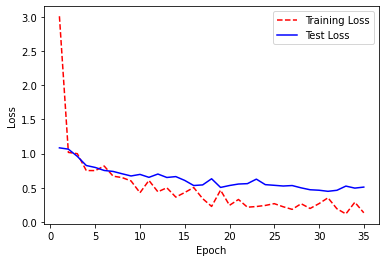

In [11]:
import matplotlib.pyplot as plt
# Get training and test loss histories
training_loss = model_fit.history['loss']
test_loss = model_fit.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();